# Calcul scientifique -- TP5 : Interpolation, ajustement 

Nom: (à remplir)

Prénom: (à remplir)

Ce travail est à rendre individuellement sur ecampus avant le 27 mars minuit.

L'intensité de la radiation d'une substance radioactive se mesure au moyen de la 'demi-vie' $b$ de la substance.


On sait que  la décroissance de la radioactivité suit la loi :$$\gamma(t) = a e^{-bt}$$  et on a mesuré les radiations suivantes :


|t (années) |0 |0.5|1|1.5|2|2.5|
|---|--- |---|---|---|---|---|
|$\gamma(t)$ |1.000 |0.994|0.990|0.985|0.979|0.977|

|t (années) |3 |3.5|4|4.5|5|5.5|
|---|--- |---|---|---|---|---|
|$\gamma(t)$ |0.972 |0.969|0.967|0.960 |0.956 | 0.952|


L'exercice vise à estimer les valeurs de a et b ou de trouver une fonction qui permet de déterminer $\gamma(t)$.





### Tracé des données

Tracer l'évolution des mesures $\gamma$ en fonction de $t$  comme sur le shéma ci-dessous

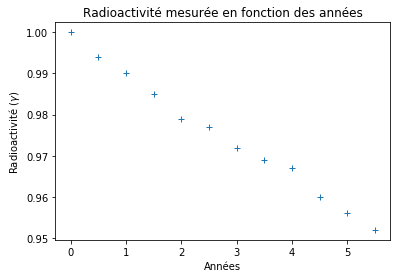

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline  

#à compléter

Nous allons désormais étudier des méthodes permettant de trouver les valeurs "optimales" de $a$ et $b$. Par optimales, nous voulons désigner les valeurs qui minimisent la somme des erreurs quadratiques avec les données (c.f. cours).

### Première méthode.

Nous allons calculer la somme des erreurs au carré en fonction de $a$ et $b$  : $$ S(a,b) = \sum_t(\gamma_t-ae^{-bt})^2,$$ et rechercher des valeurs minimales de cette erreur. 

Cette erreur sera minimale pour les valeurs de $a$ et $b$ pour lesquelles $\frac{\partial S(a,b)}{\partial a} = 0$ et $\frac{\partial S(a,b)}{\partial b} = 0$.

Commencez par définir avec `sympy` l'expression correspondant à $$ (\gamma_t-ae^{-bt})^2$$

puis en déduire grâce à la dérivation de sympy les deux expressions suivantes : $$f_1(a,b)=\frac{\partial\ (\gamma_t-ae^{-bt})^2}{\partial a},$$ et $$f_2(a,b)=\frac{\partial\ (\gamma_t-ae^{-bt})^2}{\partial b}.$$

Convertissez ensuite ces deux expressions en fonctions `python` en utilisant  sympy.lambdify.

On obtient deux fonctions $f_1$ et $f_2$ qui ont chacune 4 paramètres: $a,b,t,g$

In [2]:
import  sympy

#à compléter

err(a,b)=  (a*exp(-b*t) - gamma)**2
d err(a,b)/da =  2*(a*exp(-b*t) - gamma)*exp(-b*t)
d err(a,b)/db =  -2*a*t*(a*exp(-b*t) - gamma)*exp(-b*t)


En utilisant les fonctions de la question précédente et *np.sum*, calculer les dérivées partielles de $S$ par rapport à $a$ et $b$. 

Construire ensuite une fonction $F$ qui retourne $$F(a,b)=\left[\frac{\partial S(a,b)}{\partial a},\frac{\partial S(a,b)}{\partial b}\right] .$$

Pour cette fonction on prendra t=tab et g=gtab. On la codera avec un seul argument correspondant au tableau numpy $[a,b]$.
Pour vérifier que cette fonction donne les bons résultats, calculer $F([0,0])$.

In [3]:

#à compléter

F([0,0])= [-23.401999999999997, 0.0]


Au moyen de la fonction `scipy.optimize.fsolve` vue en TP, estimez les valeurs de $a$ et $b$ annulant la dérivée. 

Les afficher (on prendra comme tablau initial  p0= np.array([ 1 , 0]).

In [4]:

#à compléter

[a,b]= [0.99843145 0.00864506]


### Vérification graphique

Tracer la courbe $\gamma(t) = a e^{-bt},$ avec les valeurs estimées de $a$ $b$ en superposant cette courbe sur les points mesurés.


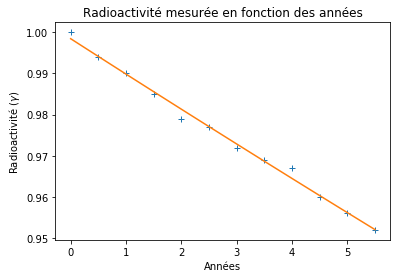

In [5]:

#à compléter

### Seconde méthode. 

Nous allons désormais utiliser la fonction `scipy.optimize.curve_fit` qui permet d'estimer directement les  paramètres $a$ et $b$ minimisant, au sens des moindres carrés, le modèle avec les mesures. Affichez les valeurs estimées et comparez-les avec les précédentes.

In [6]:

#à compléter

[a,b]= [0.99843145 0.00864506]


### Vérifications

A nouveau, tracer la fonction donnant l'évolution de la radioactivité avec les paramètres obtenus, en la superposant aux valeurs mesurées.

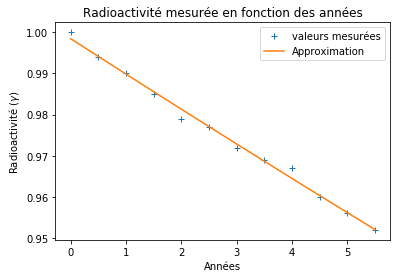

In [7]:

#à compléter

Calculer les résidus $r_i$, leur somme et leur moyenne et l'écart-type (entre mesures et valeurs estimées)

In [8]:

#à compléter

Résidus : [ 1.56854604e-03 -1.25016373e-04  1.62846672e-04 -5.67784707e-04
 -2.31683074e-03 -8.42120002e-05 -8.69849405e-04  3.26335789e-04
  2.50442198e-03 -3.35512754e-04 -1.93390699e-04 -6.91344575e-05]
Somme des résidus 4.1935400529879985e-07
Moyenne des résidus :  3.494616710823332e-08
Ecart type :  0.0011361364161152849


## interpolation

On cherche maintenant à définir une fonction (dont on n'aura pas l'expression) qui permettra d'interpoler (de trouver une valeur approchée) des points situés "entre les mesures". Pour cela on utilisera 
 scipy.interpolate.CubicSpline
 
Faire ensuite un shéma avec les valeurs mesurées, la fonction déterminer avec ajustement et celle avec interpolation.

In [9]:
import scipy.interpolate

#à compléter

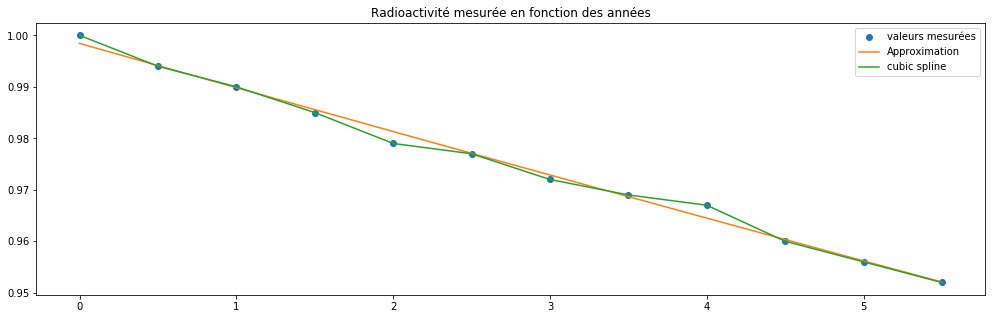

In [10]:

#à compléter